In [12]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'

# Comparison of the same datafile processed through the nearlineProcessing.fcl with v9_15 (g2nearline1) and v8_04 (g2nearline2)

---

In [13]:
f9 = r.TFile("./nearlineHist_run17969_00071_v9_15.root")
f8 = r.TFile("./nearlineHists_run17969_00071_v8_04_g2nearline2.root")

In [14]:
f9.ls()

TFile**		./nearlineHist_run17969_00071_v9_15.root	
 TFile*		./nearlineHist_run17969_00071_v9_15.root	
  KEY: TDirectoryFile	nearlineHistTree;1	nearlineHistTree (CaloNearlineHistograms) folder
  KEY: TDirectoryFile	clusterTree;1	clusterTree (ClusterTree) folder
  KEY: TDirectoryFile	t0Analyzer;1	t0Analyzer (T0PulseProcessorAnalyzer) folder
  KEY: TDirectoryFile	ibmsAnalyzer;1	ibmsAnalyzer (IBMSAnalyzer) folder
  KEY: TDirectoryFile	CoincidenceFinderLM;1	CoincidenceFinderLM (CoincidenceFinderLM) folder


In [15]:
f8.ls()

TFile**		./nearlineHists_run17969_00071_v8_04_g2nearline2.root	
 TFile*		./nearlineHists_run17969_00071_v8_04_g2nearline2.root	
  KEY: TDirectoryFile	nearlineHistTree;1	nearlineHistTree (CaloNearlineHistograms) folder
  KEY: TDirectoryFile	clusterTree;1	clusterTree (ClusterTree) folder
  KEY: TDirectoryFile	t0Analyzer;1	t0Analyzer (T0PulseProcessorAnalyzer) folder
  KEY: TDirectoryFile	ibmsAnalyzer;1	ibmsAnalyzer (IBMSAnalyzer) folder
  KEY: TDirectoryFile	CoincidenceFinderLM;1	CoincidenceFinderLM (CoincidenceFinderLM) folder


---

### Lets first look at the laser pulses by calorimeter from the nearlineHistTree (those pulses with energy > 10000)

In [16]:
t9 = f9.Get("nearlineHistTree").Get("eventTree")
t8 = f8.Get("nearlineHistTree").Get("eventTree")

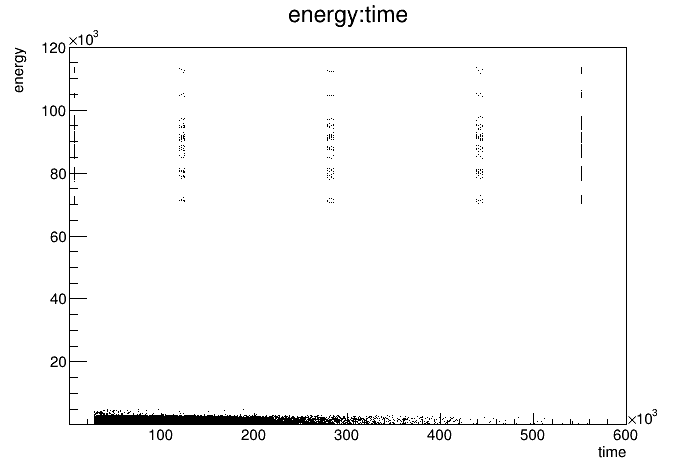

In [17]:
c = r.TCanvas()
t9.Draw("energy:time","")
c.Draw()

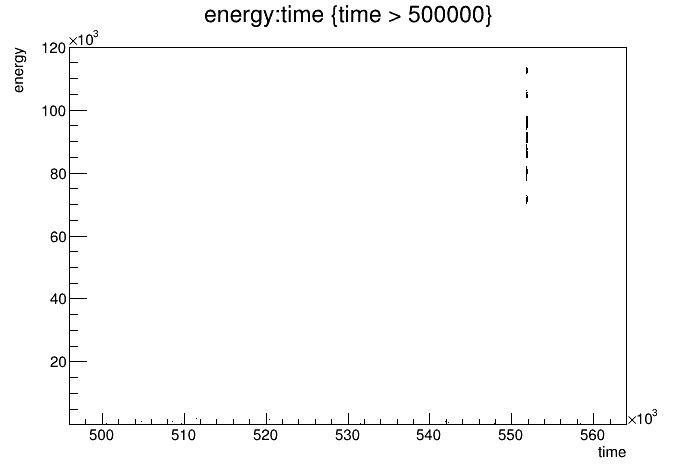

In [18]:
c = r.TCanvas()
t9.Draw("energy:time","time > 500000")
c.Draw()

### Lets select only the sync pulses to start with 

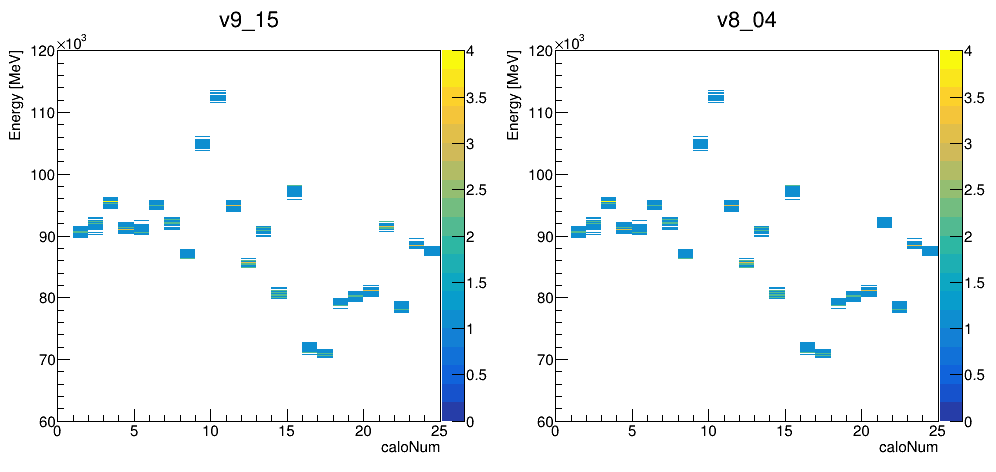

In [19]:
c = r.TCanvas("c","c",1000,500)
c.Divide(2,1)
c.cd(1)
h9 = r.TH2D("h9","v9_15; caloNum; Energy [MeV]",25,0,25,5000,60000,120000)
t9.Draw("energy:caloNum>>h9","energy>20000 && time > 500000 ","goff")
h9.Draw("COLZ")
c.cd(2)
h8 = r.TH2D("h8","v8_04; caloNum; Energy [MeV]",25,0,25,5000,60000,120000)
t8.Draw("energy:caloNum>>h8","energy>20000 && time > 500000 ","goff")
h8.Draw("colz")
c.Draw()

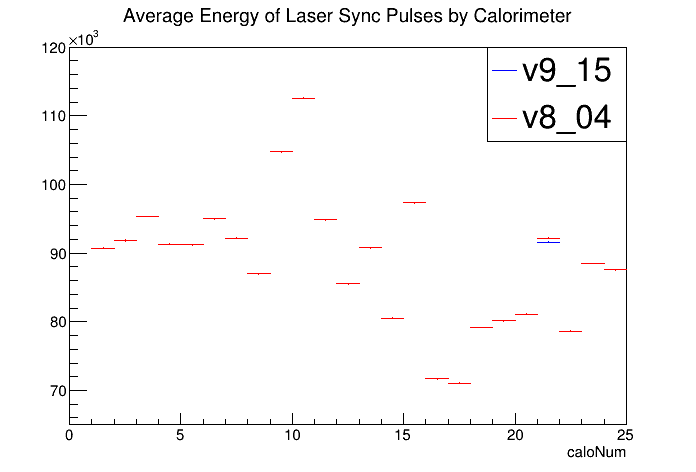

In [20]:
c2 = r.TCanvas()

Eprof9 = h9.ProfileX().Clone("Eprof9")
Eprof9.SetTitle("Average Energy of Laser Sync Pulses by Calorimeter")
Eprof9.GetYaxis().SetRangeUser(65000,120000)
Eprof9.SetLineColor(4)
Eprof9.SetMarkerColor(4)
Eprof9.Draw("")

Eprof8 = h8.ProfileX().Clone("Eprof8")
Eprof8.SetTitle("Average Values of Laser Pulses by Calorimeter")
Eprof8.SetLineColor(2)
Eprof8.SetMarkerColor(2)
Eprof8.Draw("SAME")

leg = r.TLegend(0.7,0.7,0.9,0.9)
leg.AddEntry("Eprof9","v9_15","pl")
leg.AddEntry("Eprof8","v8_04","pl")
leg.Draw()

c2.Draw()

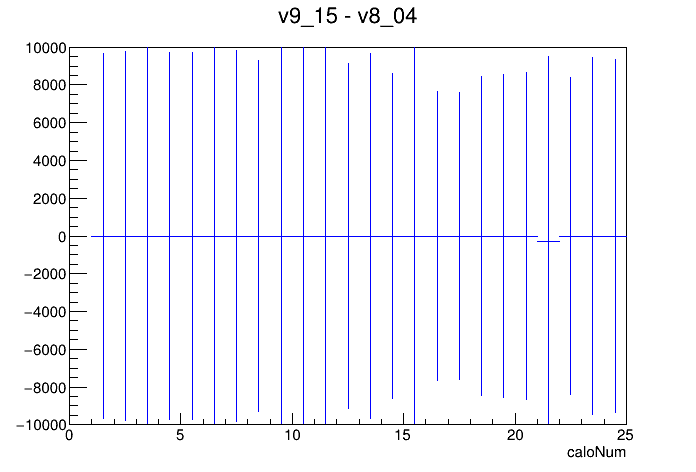

In [21]:
hdiff = Eprof9.Clone()
hdiff.Add(Eprof8,-1)
c3 = r.TCanvas()
hdiff.Draw()
hdiff.SetTitle("v9_15 - v8_04")
hdiff.GetYaxis().SetRangeUser(-10000,10000)
c3.Draw()